# Lecture 4: Data Visualization
## 10/13/19
### Hosted and maintained by [Student Association for Applied Statistics (SAAS)](https://saas.berkeley.edu). Authored by [Angela Zhou](mailto:zhoa210@berkeley.edu) and [Ellis Cho](mailto:choellis0510@berkeley.edu).

### Table of Contents
* [Types of Variables](#typesofvariables)
* [Lineplots](#lineplots)
    * [Lineplots in Matplotlib](#pltlineplots)
    * [Lineplots in Seaborn](#snslineplots)
* [Scatterplots](#scatterplots)
    * [Scatterplots in Matplotlib](#pltscatter)

## Steps for changing this notebook:

## Accessing the notebook
 1. go to the correct github folder `Fall-2019-Career-Exploration`on your laptop terminal and `cd` into it
 2. type `git pull --rebase` 
 > VERY IMPORTANT STEP!!
 > this will update your local folder with whatever has been done and most recently put into the shared github folder
 3. go into  `Lecture4` and type `jupyter notebook` to run your local host 
 4. Click on the "Data Visualization" notebook
 5. Then do whatever you want to the notebook
 6. Be sure to save your notebook frequently (with "Save and Checkpoint")
 
## When you're done
1. Save and Checkpoint the notebook 
2. Go to your terminal
3. Press "control" and "c" at the same time to exit form your local jupyter notebook thing
4. Type "y" and enter
5. Then type `git status` 
> this will show the status of your github repo. It should show you the name of the file you changed in RED
6. Then type `git add [name of file you changed]`
7. Type `git status` again to check the status. The file name should now be GREEN which is good because that means that git is tracking your file
8. Type `git commit -m "[message]"` The message can be whatever you want but please make it informative. Also this has to be a string so don't forget your quotes
9. VERY IMPORTANT!! Type `git pull --rebase`
 > If you forget this we will have merge conflicts and want to cry :'(
10. Then type `git push` and this will push your file to the official SUSA github repo. 
 > PLEASE PLEASE PLEASE ALWAYS make sure you type `git pull --rebase` before you push
11. This should be it I hope lmao 
    

In [4]:
# Setup code
import seaborn as sns #; sns.set()
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
from pathlib import Path

%matplotlib inline
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['figure.dpi'] = 150
sns.set()

from IPython.display import display, Latex, Markdown

bike = pd.read_csv('bikeshare.txt')

<a id='typesofvariables'></a>
## Types of Variables

Understanding what types of data you're working with—and hence what types of variables your data has—is essential when determining what kinds of visualizations may be most appropriate and most effective to illustrate your data. Not all visualizations are suited for all types of data! It is also important to understand the types of variables in your dataset when considering what specific goal(s) you want to accomplish with your visualizations; this concept will become more clear as we continue through this lecture notebook.

There are two principal categories of data, each of which can be subdivided into two subcategories; this gives us four main categories of data in total:

- **Qualitative/Categorical**: a variable that has discrete values or distinct characteristics that represent *categories*
    - **Ordinal**: a categorical variable whose categories have a clear *ordering* or sequence, so the categories have a numerical or sequential meaning. 
        - e.g. education level: `elementary school`, `middle school`, `high school`; year in Berkeley: `freshman`, `sophomore`, `junior`, `senior`
    - **Nominal**: a categorial variable whose categories exist by *name* only, with no inherent numerical value or sequential ordering
        - e.g. `Cal ID number`; major at UC Berkeley: `data science`, `statistics`, `computer science`, `economics`
- **Quantitative/Numeric**: a variable that is measured on a numeric scale
    - **Continuous**: a quantitative variable that can take on an infinite number of values; think of continuous quantitative variables as things you can measure.
        - e.g. `weight`, `temperature`, 
    - **Discrete**: a quantitative variable that can only take on certain values, usually integer values; think of discrete quantitative variables as things you can count.
        - e.g. `number of siblings`, `number of semesters completed at UC Berkeley`

The data we are exploring is collected from a bike sharing system in Washington D.C.

In [2]:
# Our dataset
bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


The variables in this data frame are defined as:

Variable       | Description
-------------- | ------------------------------------------------------------------
instant | record index
dteday | date
season | 1. spring <br> 2. summer <br> 3. fall <br> 4. winter
yr | year (0: 2011, 1:2012)
mnth | month ( 1 to 12)
hr | hour (0 to 23)
holiday | whether day is holiday or not
weekday | day of the week
workingday | if day is neither weekend nor holiday
weathersit | 1. clear or partly cloudy <br> 2. mist and clouds <br> 3. light snow or rain <br> 4. heavy rain or snow
temp | normalized temperature in Celsius (divided by 41)
atemp | normalized "feels-like" temperature in Celsius (divided by 50)
hum | normalized percent humidity (divided by 100)
windspeed| normalized wind speed (divided by 67)
casual | count of casual users
registered | count of registered users
cnt | count of total rental bikes including casual and registered 

**Practice:** identify what type of variable each of the columns (except `instant`) in our dataset represent.

<a id='lineplots'></a>
## Lineplots

One of the most fundamental types of plots is a lineplot. Lineplots are used to visualize relationships between **one numeric variable** on the y-axis and **one ordinal variable** on the x-axis. A lineplot consists of data points, often called *markers*, that are plotted on an *x,y* coordinate plane with straight lines connecting one point to the next. Often, lineplots are used to illustrate a trend in data values over a series of time, and hence the line follows chronological order from left to right; more specifically this plot would be called a *time series* plot.

<a id='pltlineplots'></a>
### Lineplots in Matplotlib
[Lineplots](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) are the simplest, most basic type of data visualization that you can plot in Matplotlib. They are created using the `plt.plot()` function, whose argument is just some data that we want to visualize! This data can be in the form of a NumPy array or a Python list.

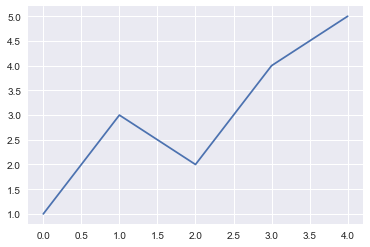

In [3]:
# Run this cell to see one way how `plt.plot()` works!
plt.plot([1, 3, 2, 4, 5])
plt.show()

In the cell above, the list `[1, 3, 2, 4, 5]` that we passed into the `plt.plot()` function, because it is the only data argument, is assumed by Matplotlib to be a list of the y-values. Hence, it automatically assigns the integers `[0, 1, 2, 3, 4]` to be the x-values. When you plot values in this way, it will automatically assign x-values as a range from 0 up to the length of the y-values you passed in. 

If you want to define the x-values, you can just pass them in as the first argument, so you have the option of calling plot in either of the following ways:
    
    plt.plot(y_values)
    plt.plot(x_values, y_values)
    
**Pro-tip:** After typing `plt.plot()` into a Jupyter Notebook code cell, you can use the `shift+tab` trick to see what arguments `plt.plot()` takes in.

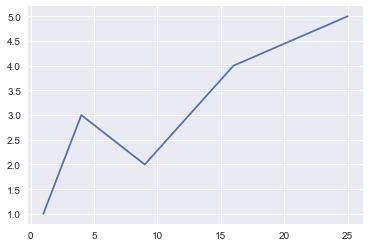

In [4]:
# Run this cell to see how we can pass in `x_values` and `y_values` into `plt.plot()`
plt.plot([1, 4, 9, 16, 25], [1, 3, 2, 4, 5])
plt.show()

**[Angela's stuff goes here]**

**Practice:** Use the `bike_by_month` dataframe below to plot the total number of bikeshare riders per month of the year. 

*Hint: use `list(bike_by_month.index)` to get the months as a list of integers 1 through 12.*

In [5]:
bike_by_month = bike[["mnth", "casual", "registered", "cnt"]].groupby("mnth").agg(sum)
bike_by_month.head()

,casual,registered,cnt
mnth,,,
1,12042,122891,134933
2,14963,136389,151352
3,44444,184476,228920
4,60802,208292,269094
5,75285,256401,331686


In [6]:
# Your code here

**Challenge:** Also using the `bike_by_month` dataframe, plot the total number of casual riders per month of the year and the total number of registered riders per month of the year **on the same plot**. Make the `registered` rider plot red and make the `casual` rider plot blue.

In [7]:
# Your code here

<a id='snslineplots'></a>
### Lineplots in Seaborn
The function to create [Lineplots in Seaborn](https://seaborn.pydata.org/generated/seaborn.lineplot.html) follow a very similar to its Matplotlib counterpart in terms of its arguments. It also has the optional `hue` variable which automatically color-codes your plot based on another variable of interest. 

    sns.lineplot(x_values, y_values, hue)
    
For example, if we wanted to plot 

In [7]:
sns.lineplot()

AttributeError: module 'seaborn' has no attribute 'lineplot'

<a id='scatterplots'></a>
## Scatterplots

Scatterplots are used to visualize relationships between **two numeric variables**, particularly if both of them are continuous numeric. A scatterplot consists of data points, or *markers*, that are plotted on an *x,y* coordinate plane. Each data point represents a single observation from a dataset and is characterized by two variables, one mapped to the x-axis and the other mapped to the y-axis.

However, unlike a lineplot, in a scatterplot there is not only one marker per x coordinate -value, and line segements do not connect each marker. Hence, a scatterplot often resembles **a cloud of data points** that hopefully resemble some discernible trend that can be used to summarize some sort of relationship or correlation between the x-variable and the y-variable.

<a id='pltscatter'></a>
### Scatterplots in Matplotlib
[Scatterplots](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html?highlight=scatter#matplotlib.pyplot.scatter) in matplotlib also have a similar function and argument structure as the lineplot function, `plt.plot()`. The function to make a scatterplot in Matplotlib is `plt.scatter()` which takes in the following essential arguments:

    plt.scatter(x_values, y_values)
    
Similar to `plt.plot()`, the `x_values` and `y_values` can be either in the form of NumPy arrays or Python lists.